# KNN and VDM

## Author: Asad Mahmood

<a id='toc'> </a>
## Table of Contents

1. [**Importing Train & Test Dataset**](#Dataset)<br/>
 <br/>
2. [**Problem 1**](#Problem1)<br/>
 + [Part 1](#PPart1)<br/>
 + [Part 2](#PPart2)<br/>
 <br/>
3. [**Problem 2**](#Problem2)<br/>
 + [Part 1](#Part1)<br/>
 + [Part 2](#Part2)<br/>
 + [Part 3](#Part3)<br/>
 + [Part 4](#Part4)<br/>
 + [Part 5](#Part5)<br/>

<a id='Dataset'> </a>
## Importing Train & Test Dataset

In [ ]:
# Importing Libraries
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import math
import statistics

Importing libraries that are gonna be used to implement this algorithim

### Training Dataset

In [ ]:
# Importing the training dataset
trainDataset = pd.read_csv('healthcareTrain.csv')

The list of features extracted for **training set:**<br/>
+ "pre-rx-cost"
+ "numofgen"
+ "numofbrand"
+ "generic-cost"
+ "adjust-total-30d"
+ "num-er"

In [ ]:
#Feature Extraction
X = trainDataset[["pre_rx_cost", "numofgen", "numofbrand", "generic_cost", "adjust_total_30d", "num_er"]]
y = trainDataset[["pdc_80_flag"]]

### Test Dataset

In [ ]:
testDataset = pd.read_csv('healthcareTest.csv')

The list of features extracted for **test set:**<br/>
+ "pre-rx-cost"
+ "numofgen"
+ "numofbrand"
+ "generic-cost"
+ "adjust-total-30d"
+ "num-er"

In [ ]:
#Feature Extraction
X_t = testDataset[["pre_rx_cost", "numofgen", "numofbrand", "generic_cost", "adjust_total_30d", "num_er"]]
y_t = testDataset[["pdc_80_flag"]]

### Feature Scaling - Linear Normalization

In [ ]:
#Scaling Train Set
X_train = (X-X.min())/(X.max()-X.min())

#Scaling Test Set
X_test = (X_t-X.min())/(X.max()-X.min())

<a id='Problem1'> </a>
## Problem 1

<a id='PPart1'> </a>
### Part 1

### Bult in KNN function implementation

In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from prettytable import PrettyTable

#List to store accuracy
acc = []

#List to store neighbours
neighbours = []

#Table to show neighbours and accuracy
accTable = PrettyTable()
accTable.field_names = ["k","accuracy"]

#Running knn for nearest neighbour 75 to 107 with a step size of 2
for k in range(75,107,2):
    
    #Creating classifier
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean', p = 2)
    classifier.fit(X_train, y.values.ravel())
    
    #Predict results
    y_pred = classifier.predict(X_test)
    
    #Calculating accuracy
    accuracy = metrics.accuracy_score(y_t,y_pred)
    
    #Adding rows to the table
    accTable.add_row([k,accuracy*100])
    
    #Appending lists of neighbours and accuracy
    neighbours.append(k)
    acc.append(accuracy*100)

NOTE: Using **y.values.ravel()** to suppress the excessive warnings. 
 + **.values** will give the values in an array. (shape: (n,1)
 + **.ravel** will convert that array shape to (n, )

### Printing the table

In [ ]:
print(accTable)

+-----+-------------------+
|  k  |      accuracy     |
+-----+-------------------+
|  75 | 66.86046511627907 |
|  77 | 66.56976744186046 |
|  79 | 66.86046511627907 |
|  81 | 66.56976744186046 |
|  83 | 66.27906976744185 |
|  85 | 66.56976744186046 |
|  87 | 66.56976744186046 |
|  89 | 66.56976744186046 |
|  91 | 66.56976744186046 |
|  93 | 65.40697674418605 |
|  95 | 65.98837209302324 |
|  97 | 66.27906976744185 |
|  99 | 66.86046511627907 |
| 101 | 67.15116279069767 |
| 103 | 67.73255813953489 |
| 105 | 66.86046511627907 |
+-----+-------------------+


<a id='PPart2'> </a>
### Part 2

### Plotting Graph

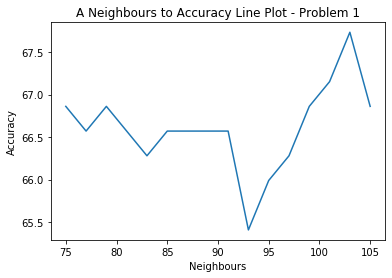

In [ ]:
#plotting a line graph
plt.plot(neighbours, acc)
# Labeling the X-axis 
plt.xlabel('Neighbours') 
# Labeling the Y-axis 
plt.ylabel('Accuracy') 
# Give a title to the graph
plt.title('A Neighbours to Accuracy Line Plot - Problem 1') 
plt.show()

The k with the value of 103 gives the best accuracy i.e 67.73255813953489

<a id='Problem2'> </a>
## Problem 2

Reading in dataset for Problem 2 with new columns.

In [ ]:
#Reading in the train and test features
X_P2 = trainDataset[["regionN", "pre_rx_cost", "numofgen", "numofbrand", "generic_cost", "adjust_total_30d", "num_er","pdc_80_flag"]]

Y_P2 = testDataset[["regionN", "pre_rx_cost", "numofgen", "numofbrand", "generic_cost", "adjust_total_30d", "num_er","pdc_80_flag"]]

### Scaling Feautures

Before scaling the feautures i am removing the column "regionN" from the list as it is used in VDM and there's no need to scale them. After scaling them they will be joined back.

In [ ]:
# Dropping regionN colmn for scaling rest of the feautures.
X_temp = X_P2.drop(["regionN"], axis = 1)
Y_temp = Y_P2.drop(["regionN"], axis = 1)

In [ ]:
#Scaling Train Set
X_train = (X_temp-X_temp.min())/(X_temp.max()-X_temp.min())

#Scaling Test Set
X_test = (Y_temp-X_temp.min())/(X_temp.max()-X_temp.min())

In [ ]:
# Joining regionN column to train and test sets
trainP2 = X_train.join(X_P2.loc[:,"regionN"])
testP2 = X_test.join(Y_P2.loc[:,"regionN"])

<a id='Part1'> </a>
### Part 1

### VDM - Conditional Probabilities

In [ ]:
# create a table to show what we need
vdm = PrettyTable()
vdm.field_names = ["Region", "Class_1: 1", "Class_2: 0"]
vdm.add_row([1,"P(1|1)","P(0|1)"])
vdm.add_row([2,"P(1|2)","P(0|2)"])
vdm.add_row([3,"P(1|3)","P(0|3)"])
vdm.add_row([4,"P(1|4)","P(0|4)"])
print(vdm)

+--------+------------+------------+
| Region | Class_1: 1 | Class_2: 0 |
+--------+------------+------------+
|   1    |   P(1|1)   |   P(0|1)   |
|   2    |   P(1|2)   |   P(0|2)   |
|   3    |   P(1|3)   |   P(0|3)   |
|   4    |   P(1|4)   |   P(0|4)   |
+--------+------------+------------+


In [ ]:
# create variable to count the numer for each category
region1 = 0
result1 = 0
region2 = 0
result2 = 0
region3 = 0
result3 = 0
region4 = 0
result4 = 0
# use for loop to iterate in dataset
for i in range(len(trainP2)):
    # if the region is 1
    if trainP2.loc[i, "regionN"] == 1:
        # region1 will add one
        region1+=1
        # if the pdc result is one
        if trainP2.loc[i, "pdc_80_flag"] == 1:
            # result1 will add one
            result1+=1
    if trainP2.loc[i, "regionN"] == 2:
        region2+=1
        if trainP2.loc[i, "pdc_80_flag"] == 1:
            result2+=1
    if trainP2.loc[i, "regionN"] == 3:
        region3+=1
        if trainP2.loc[i, "pdc_80_flag"] == 1:
            result3+=1
    if trainP2.loc[i, "regionN"] == 4:
        region4+=1
        if trainP2.loc[i, "pdc_80_flag"] == 1:
            result4+=1
# calculate the probability
p11 = result1/region1
p01 = 1-p11
p12 = result2/region2
p02 = 1-p12
p13 = result3/region3
p03 = 1-p13
p14 = result4/region4
p04 = 1-p14

In [ ]:
# create pretty table for the result of probability for each category
vdmr = PrettyTable()
vdmr.field_names = ["Region", "Class_1: 1", "Class_2: 0"]
vdmr.add_row([1, p11, p01])
vdmr.add_row([2, p12, p02])
vdmr.add_row([3, p13, p03])
vdmr.add_row([4, p14, p04])
print(vdmr)

+--------+---------------------+---------------------+
| Region |      Class_1: 1     |      Class_2: 0     |
+--------+---------------------+---------------------+
|   1    |  0.5045045045045045 | 0.49549549549549554 |
|   2    |  0.4314214463840399 |  0.5685785536159601 |
|   3    | 0.35400516795865633 |  0.6459948320413437 |
|   4    | 0.42391304347826086 |  0.5760869565217391 |
+--------+---------------------+---------------------+


<a id='Part2'> </a>
### Part 2

### Calcluting distances

In [ ]:
# distance between 1 Northeast and 2 Midwest
d12 = (p11 - p12)**2 + (p01 - p02)**2
# distance between 1 Northeast and 3 South
d13 = (p11 - p13)**2 + (p01 - p03)**2
# distance between 1 Northeast and 4 West
d14 = (p11 - p14)**2 + (p01 - p04)**2

# distance between 2 Midwest and 1 Northeast
d21 = (p12 - p11)**2 + (p02 - p01)**2
# distance between 2 Midwest and 3 South
d23 = (p12 - p13)**2 + (p02 - p03)**2
# distance between 2 Midwest and 4 West
d24 = (p12 - p14)**2 + (p02 - p04)**2

# distance between 3 South and 1 Northeast
d31 = (p13 - p11)**2 + (p03 - p01)**2
# distance between 3 South and 2 Midwest
d32 = (p13 - p12)**2 + (p03 - p02)**2
# distance between 3 South and 4 West
d34 = (p13 - p14)**2 + (p03 - p04)**2

# distance between 4 West and 1 Northeast
d41 = (p14 - p11)**2 + (p04 - p01)**2
# distance between 4 West and 2 Midwest
d42 = (p14 - p12)**2 + (p04 - p02)**2
# distance between 4 West and 3 South
d43 = (p14 - p13)**2 + (p04 - p03)**2

# create distance table
distanceTable = PrettyTable()
distanceTable.field_names = ["","1 Northeast", "2 Midwest", "3 South", "4 West"]
distanceTable.add_row(["1 Northeast", 0, d12, d13, d14])
distanceTable.add_row(["2 Midwest", d21, 0, d23, d24])
distanceTable.add_row(["3 South", d31, d32, 0, d34])
distanceTable.add_row(["4 West", d41, d42, d43, 0])
print(distanceTable)

+-------------+----------------------+------------------------+----------------------+------------------------+
|             |     1 Northeast      |       2 Midwest        |       3 South        |         4 West         |
+-------------+----------------------+------------------------+----------------------+------------------------+
| 1 Northeast |          0           |  0.010682266768478402  | 0.04530010060148092  |  0.01298996718068908   |
|  2 Midwest  | 0.010682266768478402 |           0            | 0.011986560330473019 | 0.00011275222839102203 |
|   3 South   | 0.04530010060148092  |  0.011986560330473019  |          0           |  0.009774222119329046  |
|    4 West   | 0.01298996718068908  | 0.00011275222839102203 | 0.009774222119329046 |           0            |
+-------------+----------------------+------------------------+----------------------+------------------------+


<a id='Part3'> </a>
### Part 3

### KNN Implementation

In [ ]:
#Droping out training label
trainP2 = trainP2.drop(["pdc_80_flag"], axis = 1)
testP2 = testP2.drop(["pdc_80_flag"], axis = 1)

In [ ]:
#Converting to numpy array
trainP2 = trainP2.values
testP2 = testP2.values
y = y.values
y_t = y_t.values

### Euclidiean distance function

In [ ]:
import math

def distFunc(a,b):
    dis = 0
    for i in range(6):
        dis += (a[i] - b[i])**2
    return dis

In [ ]:
import math  

def EuclideanDistance(x,y):
    
    # All matching regions handled
    # Northeast - Region 1
    if x[6] == 1 and y[6] == 1:
        dist = math.sqrt(distFunc(x,y) + 0 )
    # Midwest - Region 2
    elif x[6] == 2 and y[6] == 2:
        dist = math.sqrt(distFunc(x,y) + 0 )
    # South - Region 3
    elif x[6] == 3 and y[6] == 3:
        dist = math.sqrt(distFunc(x,y) + 0 )
    # West - Region 4    
    elif x[6] == 4 and y[6] == 4:
        dist = math.sqrt(distFunc(x,y) + 0 )
    # Regions with Region 1 and Region 2 
    elif x[6] == 1 and y[6] == 2:
        dist = math.sqrt(distFunc(x,y) + d12 )
    # Regions with Region 1 and Region 3 
    elif x[6] == 1 and y[6] == 3:
        dist = math.sqrt(distFunc(x,y) + d13 )
    # Regions with Region 1 and Region 4 
    elif x[6] == 1 and y[6] == 4:
        dist = math.sqrt(distFunc(x,y) + d14 )
    # Regions with Region 2 and Region 1 
    elif x[6] == 2 and y[6] == 1:
        dist = math.sqrt(distFunc(x,y) + d21 )
    # Regions with Region 2 and Region 3 
    elif x[6] == 2 and y[6] == 3:
        dist = math.sqrt(distFunc(x,y) + d23 )
    # Regions with Region 2 and Region 4 
    elif x[6] == 2 and y[6] == 4:
        dist = math.sqrt(distFunc(x,y) + d24 )
    # Regions with Region 3 and Region 1 
    elif x[6] == 3 and y[6] == 1:
        dist = math.sqrt(distFunc(x,y) + d31 )
    # Regions with Region 3 and Region 2 
    elif x[6] == 3 and y[6] == 2:
        dist = math.sqrt(distFunc(x,y) + d32 )
    # Regions with Region 3 and Region 4 
    elif x[6] == 3 and y[6] == 4:
        dist = math.sqrt(distFunc(x,y) + d34 )
    # Regions with Region 4 and Region 1 
    elif x[6] == 4 and y[6] == 1:
        dist = math.sqrt(distFunc(x,y) + d41 )
    # Regions with Region 4 and Region 2 
    elif x[6] == 4 and y[6] == 2:
        dist = math.sqrt(distFunc(x,y) + d42 )
    # Regions with Region 4 and Region 3 
    elif x[6] == 4 and y[6] == 3:
        dist = math.sqrt(distFunc(x,y) + d43 )
    return dist

### KNN Implementation

In [ ]:
'''
This is a VDM KNN implementation and it takes in the following paramenters
    1. train : training set 
    2. train_labels : training set labels
    3. test : test point
    4. k : A numeric value can be passed here to select the number of nearest neighbours to use.                     
'''

def Knn(train, train_labels, test, k):
    
    # This will store the k nearest neighbours in it along with their training labels 
    neighbours=[]

    # This loops through the training set points and calculates the distance in this case euclidean distance 
    # between the test point and all the training set points. Then it appends it to neighbours list along 
    # with the training set labels.
    
    for trainPt in range(len(train)):
        euclidian_dist = EuclideanDistance(train[trainPt], test)
        neighbours.append((euclidian_dist,train_labels[trainPt]))
        
    # Now the neighbours list is sorted and only the top k neighbours are left behind for voting.
    neighbours = sorted(neighbours)[:k]

    # These variables will be used to store the cummilative weighted votes for each class/label.
    VotesClassA = 0    # This variable will store votes if the label is "-1"
    VotesClassB = 0    # This variable will store votes if the label is "1"
    
    # We will loop through the neighbours and check if they match a certain class The votes will be added and the 
    # label with higher value will be assigned to the test point.
    for n in neighbours: 
        if n[1] == 0: 
            VotesClassA += 1 
              
        elif n[1] == 1:  
            VotesClassB += 1 
              
    
    if VotesClassA>VotesClassB:
        return 0
    else:
        return 1

### Prediction of Labels of test points

In [ ]:
#Table to show neighbours and accuracy
accTable2 = PrettyTable()
accTable2.field_names = ["k","accuracy"]

acc2 = []
neighbours2 = []

for k in range(75,107,2):

    predicted_Labels = []

    for i in range(len(testP2)):
        predicted_Labels.append(Knn(trainP2, y, testP2[i], k))
        
    #Calculating accuracy
    accuracy = metrics.accuracy_score(y_t,predicted_Labels)

    #Adding rows to the table
    accTable2.add_row([k,accuracy*100])

    #Appending lists of neighbours and accuracy
    neighbours2.append(k)
    acc2.append(accuracy*100)

In [ ]:
print(accTable2)

+-----+--------------------+
|  k  |      accuracy      |
+-----+--------------------+
|  75 | 65.98837209302324  |
|  77 | 64.82558139534885  |
|  79 | 64.82558139534885  |
|  81 | 65.11627906976744  |
|  83 | 64.82558139534885  |
|  85 | 65.11627906976744  |
|  87 | 63.372093023255815 |
|  89 | 64.53488372093024  |
|  91 | 64.53488372093024  |
|  93 | 64.82558139534885  |
|  95 | 63.95348837209303  |
|  97 | 63.662790697674424 |
|  99 | 63.372093023255815 |
| 101 | 63.08139534883721  |
| 103 | 64.24418604651163  |
| 105 | 65.40697674418605  |
+-----+--------------------+


The k value with the highest accuracy is 75 with the accuracy value of 65.98837209302324 percent.

### Mean Accuracy Comparison

In [ ]:
def Mean(List): 
    return sum(List) / len(List) 

In [ ]:
#Model 1 Mean Accuracy
prob1MeanAcc = Mean(acc)

In [ ]:
#Model 2 Mean Accuracy
prob2MeanAcc = Mean(acc2)

In [ ]:
if prob1MeanAcc > prob2MeanAcc:
    print("The first problem model has higher mean accuracy which means accuracy has decreased.")
else:
    print("The second problem model has higher mean accuracy which means accuracy has increased.")

The first problem model has higher mean accuracy which means accuracy has decreased.


<a id='Part4'> </a>
### Part 4

### Plotting Graph

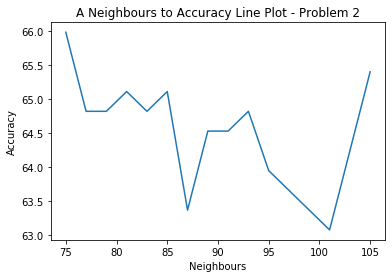

In [ ]:
#plotting a line graph
plt.plot(neighbours2, acc2)
# Labeling the X-axis 
plt.xlabel('Neighbours') 
# Labeling the Y-axis 
plt.ylabel('Accuracy') 
# Give a title to the graph
plt.title('A Neighbours to Accuracy Line Plot - Problem 2') 
plt.show()

The k value with the highest accuracy is 75 with the accuracy value of 65.98837209302324 percent.

<a id='Part5'> </a>
### Part 5

In [ ]:
#Table to show neighbours and accuracy
accTable3 = PrettyTable()
accTable3.field_names = ["k","100th test point predicted val", "200th test point predicted val", "300th test point predicted val"]

acc3 = []
neighbours3 = []

for k in range(75,107,2):

    predicted_Labels = []

    # Setting the values as 99, 199 and 299 to find 100th, 200th and 300th 
    # test point value because numpy array indexes start at 0.
    
    predicted_Labels.append(Knn(trainP2, y, testP2[99], k))
    predicted_Labels.append(Knn(trainP2, y, testP2[199], k))
    predicted_Labels.append(Knn(trainP2, y, testP2[299], k))

    #Adding rows to the table
    accTable3.add_row([k,predicted_Labels[0],predicted_Labels[1],predicted_Labels[2]])

In [ ]:
print(accTable3)

+-----+--------------------------------+--------------------------------+--------------------------------+
|  k  | 100th test point predicted val | 200th test point predicted val | 300th test point predicted val |
+-----+--------------------------------+--------------------------------+--------------------------------+
|  75 |               0                |               0                |               0                |
|  77 |               0                |               0                |               0                |
|  79 |               0                |               0                |               0                |
|  81 |               0                |               0                |               0                |
|  83 |               0                |               0                |               0                |
|  85 |               0                |               0                |               0                |
|  87 |               0              